In [994]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sloan-digital-sky-survey/Skyserver_SQL2_27_2018 6_51_39 PM.csv


In [995]:
df = pd.read_csv('/kaggle/input/sloan-digital-sky-survey/Skyserver_SQL2_27_2018 6_51_39 PM.csv')

In [996]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [997]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [998]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [999]:
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

## Distance Sparse

Redshift value shows the lookup on how early was the galaxy formed in universe. Edwin Hubble formulate the redshift into how shifted the wavelength of galaxy, thus indicating the radial velocity


\begin{align}
z = \frac{v}{c} = \frac{\lambda_{v}-\lambda_{0}}{\lambda_{0}}
\end{align}

Hubble's law could be stated in
\begin{align}
v = \frac{H_{0}}{d}
\end{align}

### Reference: 
* Ryden, Barbara. Introduction to cosmology. Cambridge University Press, 2017.

In [1000]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.cosmology import WMAP9 as cosmo

radec = SkyCoord(ra=df['ra']*u.degree, dec=df['dec']*u.degree, frame='icrs')
#radec.ra.value
#radec.dec.value
galactic = radec.galactic

df['l'] = galactic.l.value
df['b'] = galactic.b.value


r = cosmo.comoving_distance(df['redshift'])
df['distance']= r.value

df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,...,field,specobjid,class,redshift,plate,mjd,fiberid,l,b,distance
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,...,267,3.722360e+18,STAR,-0.000009,3306,54922,491,283.064461,61.513772,-0.038750
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,...,267,3.638140e+17,STAR,-0.000055,323,51615,541,283.169750,61.577466,-0.237432
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,...,268,3.232740e+17,GALAXY,0.123111,287,52023,513,283.339557,61.593309,517.978265
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,...,269,3.722370e+18,STAR,-0.000111,3306,54922,510,283.769013,61.576636,-0.478399
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,...,269,3.722370e+18,STAR,0.000590,3306,54922,512,283.762324,61.630713,2.552829


For map the location of galaxy, we need to plot the cartesian space coordinate from the equatorial coordinate. This one formulated from the galactic coordinate, known distance, galactic longitude, and galactic latitude. 


![Galactic Coordinate](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2a/Galactic_coordinates.JPG/220px-Galactic_coordinates.JPG)

\begin{align}
Image: Wikipedia
\end{align}

Galactic coordinate could be formulated into

\begin{align}
sin(b) = sin(\delta_{NGP}) \ cos(i_{g})  -  cos(\delta) \ sin(\alpha - \alpha_{NGP}) \ sin(i_{g})
\end{align}

\begin{align}
cos(b) \ cos(l-l_{0}) = cos(\delta) \ cos(\alpha - \alpha_{NG})
\end{align}

\begin{align}
cos(b) \ sin(l-l_{0}) = sin(\delta) \ sin(i_{g}) + cos (\delta) \ sin(\alpha - \alpha_{NGP})\ cos(i_{g})
\end{align}

Known $i = 62.6^{o}, \alpha_{N} = 282.5^{o}, l_{0} = 33.0^{o}$

Source: https://www.ucl.ac.uk/~ucapsj0/galcor.pdf

For the ease, thanks to kaggle, they provide astropy

In [1001]:
def cartesian(dist,alpha,delta):
    x = dist*np.cos(np.deg2rad(delta))*np.cos(np.deg2rad(alpha))
    y = dist*np.cos(np.deg2rad(delta))*np.sin(np.deg2rad(alpha))
    z = dist*np.sin(np.deg2rad(delta))
    return x,y,z

cart = cartesian(df['distance'],df['ra'],df['dec'])
df['x_coord'] = cart[0]
df['y_coord'] = cart[1]
df['z_coord'] = cart[2]

df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,...,redshift,plate,mjd,fiberid,l,b,distance,x_coord,y_coord,z_coord
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,...,-0.000009,3306,54922,491,283.064461,61.513772,-0.038750,0.038676,0.002387,-0.000061
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,...,-0.000055,323,51615,541,283.169750,61.577466,-0.237432,0.236963,0.014902,-0.000561
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,...,0.123111,287,52023,513,283.339557,61.593309,517.978265,-516.908863,-33.247690,1.140766
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,...,-0.000111,3306,54922,510,283.769013,61.576636,-0.478399,0.477308,0.032293,-0.000417
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,...,0.000590,3306,54922,512,283.762324,61.630713,2.552829,-2.546964,-0.172888,0.004569


In [1002]:
df['u-r'] = df['u']-df['r']

In [1003]:
galaxy = df[df['class']=='GALAXY']
star = df[df['class']=='STAR']
quasar = df[df['class']=='QSO']

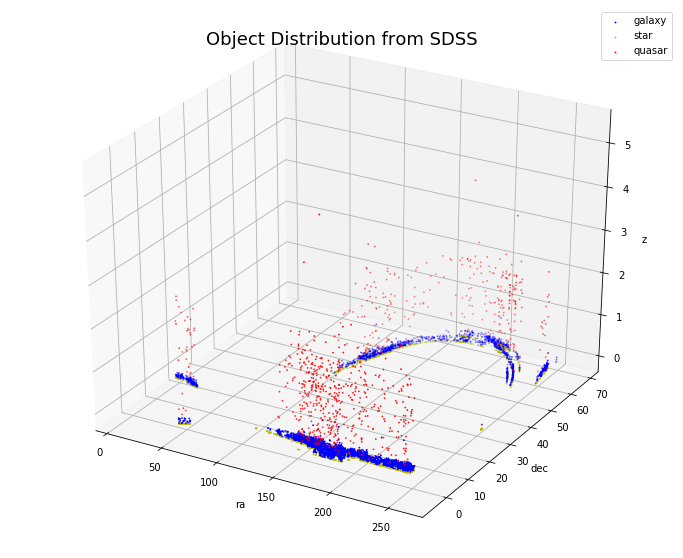

In [1004]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(galaxy['ra'],galaxy['dec'],galaxy['redshift'], s = 0.7, color = 'b', label = 'galaxy')
ax.scatter(star['ra'],star['dec'],star['redshift'], s = 0.7, color = 'y', label = 'star')
ax.scatter(quasar['ra'],quasar['dec'],quasar['redshift'], s = 0.7, color = 'r', label = 'quasar')
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_zlabel('z')
ax.set_title('Object Distribution from SDSS',fontsize=18)
plt.legend()
plt.show()

## Color Magnitude Diagram

Text(0.5, 1.0, 'CMD')

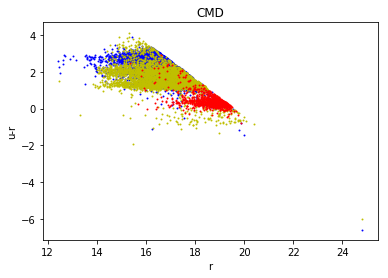

In [1005]:
plt.scatter(galaxy['r'], galaxy['u-r'], s = 0.9, color = 'b')
plt.scatter(star['r'], star['u-r'], s = 0.9, color = 'y')
plt.scatter(quasar['r'], quasar['u-r'], s = 0.9, color = 'r')
plt.xlabel('r')
plt.ylabel('u-r')
plt.title('CMD')


## Plotting the Galaxy

In [1006]:
galaxy.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,...,plate,mjd,fiberid,l,b,distance,x_coord,y_coord,z_coord,u-r
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,...,287,52023,513,283.339557,61.593309,517.978265,-516.908863,-33.247690,1.140766,1.90870
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,...,287,52023,559,283.775497,61.545469,423.983759,-423.019754,-28.574390,0.142084,2.27785
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,...,288,52000,400,283.956802,61.636921,173.648492,-173.230902,-12.032967,0.247386,1.17887
14,1.237650e+18,184.189574,0.099482,19.25667,17.54869,16.63578,16.14922,15.76639,752,301,...,288,52000,389,284.382394,61.715884,306.853300,-306.032861,-22.417660,0.532788,2.62089
19,1.237650e+18,184.380919,0.174323,17.81661,16.86976,16.53884,16.19576,16.08668,752,301,...,287,52023,632,284.726368,61.841409,309.720122,-308.813767,-23.658476,0.942324,1.27777


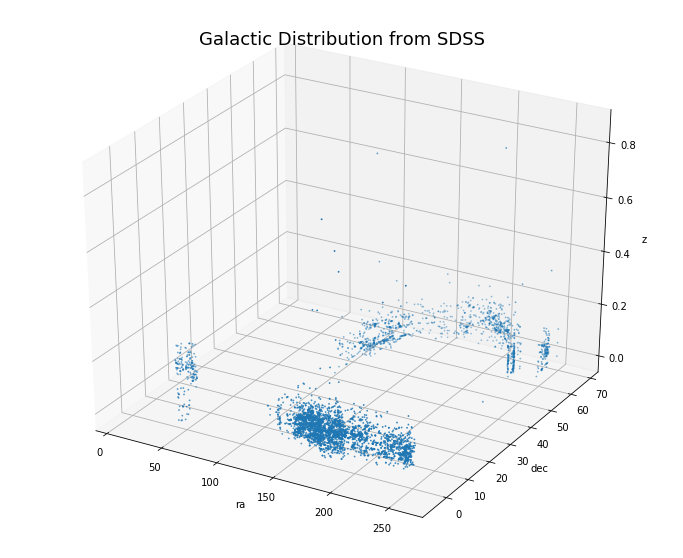

In [1007]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(galaxy['ra'],galaxy['dec'],galaxy['redshift'], s = 0.7)
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_zlabel('z')
ax.set_title('Galactic Distribution from SDSS',fontsize=18)
plt.show()

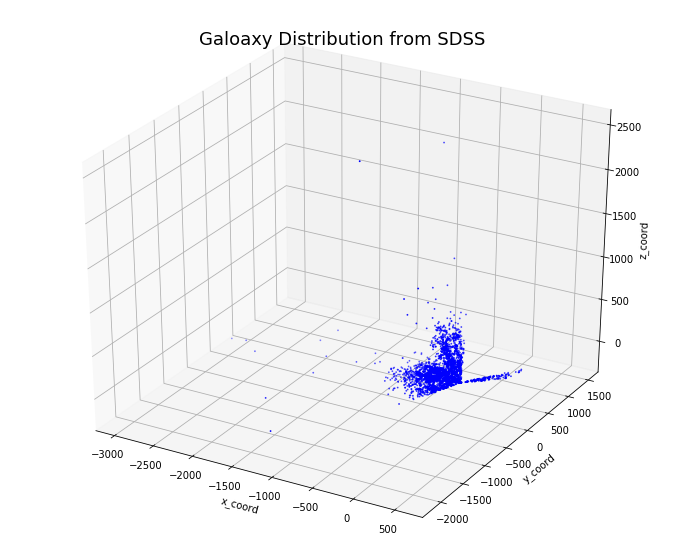

In [1008]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(galaxy['x_coord'],galaxy['y_coord'],galaxy['z_coord'], s = 0.7, color = 'b')
ax.set_xlabel('x_coord')
ax.set_ylabel('y_coord')
ax.set_zlabel('z_coord')
ax.set_title('Galoaxy Distribution from SDSS',fontsize=18)
plt.show()

# z is the position from galaxy in cartesian coordinate, not to be confused with redshift

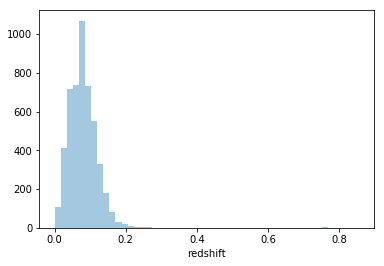

In [1009]:
sns.distplot(galaxy['redshift'], kde = False)

Text(0.5, 1.0, 'Distance (Mpc)')

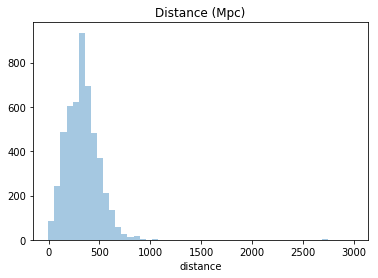

In [1010]:
sns.distplot(galaxy['distance'], kde = False)
plt.title('Distance (Mpc)')

## Plotting The Stars

In [1011]:
star.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,...,plate,mjd,fiberid,l,b,distance,x_coord,y_coord,z_coord,u-r
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,...,3306,54922,491,283.064461,61.513772,-0.038750,0.038676,0.002387,-0.000061,3.52707
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,...,323,51615,541,283.169750,61.577466,-0.237432,0.236963,0.014902,-0.000561,1.98643
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,...,3306,54922,510,283.769013,61.576636,-0.478399,0.477308,0.032293,-0.000417,1.60420
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,...,3306,54922,512,283.762324,61.630713,2.552829,-2.546964,-0.172888,0.004569,1.11156
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,...,324,51666,594,283.645667,61.688141,1.360491,-1.357419,-0.091282,0.004124,1.26682


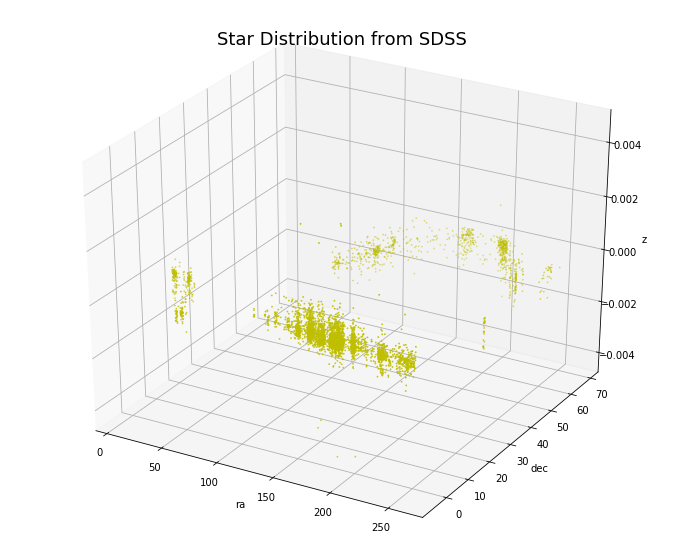

In [1012]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(star['ra'],star['dec'],star['redshift'], s = 0.7, color = 'y')
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_zlabel('z')
ax.set_title('Star Distribution from SDSS',fontsize=18)
plt.show()

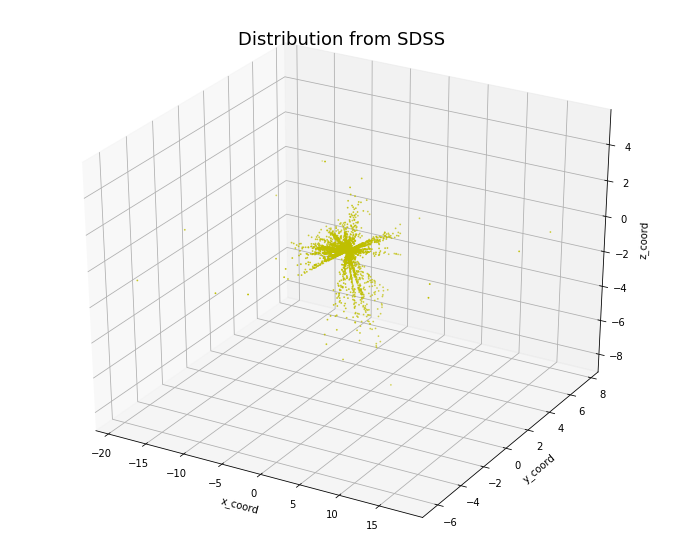

In [1013]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(star['x_coord'],star['y_coord'],star['z_coord'], s = 0.7, color = 'y')
ax.set_xlabel('x_coord')
ax.set_ylabel('y_coord')
ax.set_zlabel('z_coord')
ax.set_title('Distribution from SDSS',fontsize=18)
plt.show()

# z is the position from galaxy in cartesian coordinate, not to be confused with redshift

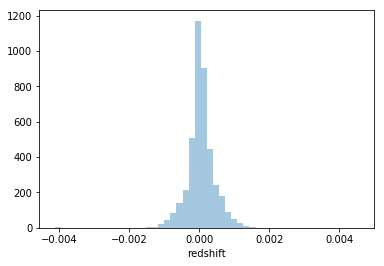

In [1014]:
sns.distplot(star['redshift'], kde = False)


### Stars appeared to be centered at 0 redshift since it is too close

## Plotting the Quasi-Stellar Objects

In [1015]:
quasar.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,...,plate,mjd,fiberid,l,b,distance,x_coord,y_coord,z_coord,u-r
15,1.237650e+18,184.350647,0.207230,18.73832,18.60962,18.39696,18.31174,17.97663,752,301,...,287,52023,587,284.645300,61.864576,1104.128967,-1100.940182,-83.758851,3.993446,0.34136
17,1.237650e+18,184.245664,0.198257,19.22143,19.30248,19.13823,19.11351,19.23454,752,301,...,287,52023,583,284.437100,61.826487,3785.572977,-3775.161970,-280.255744,13.098960,0.08320
22,1.237650e+18,184.654170,0.122673,19.07731,18.64518,18.49678,18.52677,18.45765,752,301,...,288,52000,421,285.313481,61.866527,3172.380409,-3161.912583,-257.410458,6.792237,0.58053
45,1.237650e+18,185.164376,0.074358,17.55001,17.42367,17.35734,17.19343,16.97589,752,301,...,288,52000,516,286.386196,61.953275,5357.022201,-5335.271187,-482.203164,6.952305,0.19267
62,1.237650e+18,160.384806,-0.586705,19.52565,19.29625,18.95885,18.52108,18.57694,756,301,...,275,51910,281,249.189134,48.254624,564.982557,-532.167848,189.655481,-5.785281,0.56680


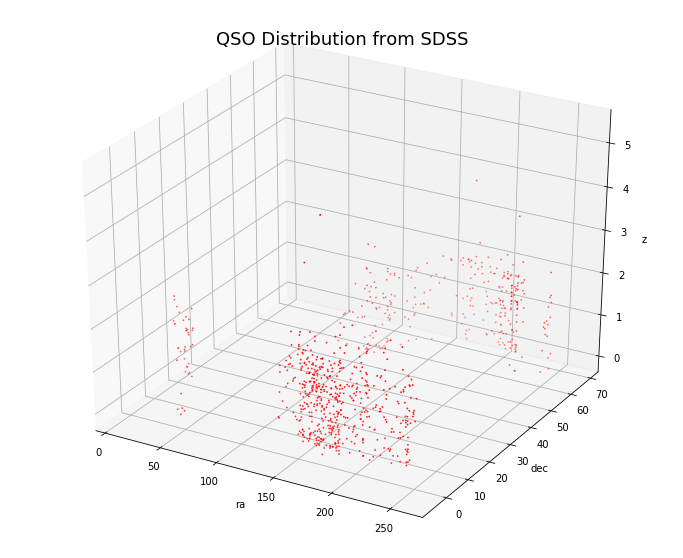

In [1016]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(quasar['ra'],quasar['dec'],quasar['redshift'], s = 0.7, color = 'r')
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_zlabel('z')
ax.set_title('QSO Distribution from SDSS',fontsize=18)
plt.show()

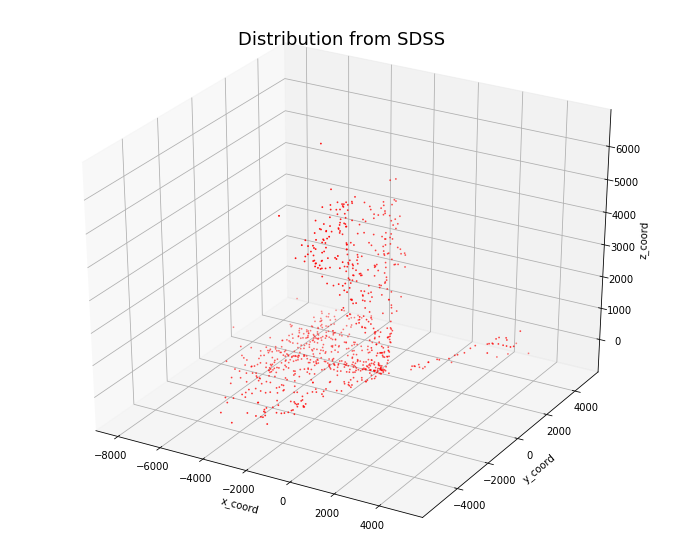

In [1017]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(quasar['x_coord'],quasar['y_coord'],quasar['z_coord'], s = 0.7, color = 'r')
ax.set_xlabel('x_coord')
ax.set_ylabel('y_coord')
ax.set_zlabel('z_coord')
ax.set_title('Distribution from SDSS',fontsize=18)
plt.show()

# z is the position from galaxy in cartesian coordinate, not to be confused with redshift

## Summing up

In [1018]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,...,plate,mjd,fiberid,l,b,distance,x_coord,y_coord,z_coord,u-r
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,...,3306,54922,491,283.064461,61.513772,-0.038750,0.038676,0.002387,-0.000061,3.52707
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,...,323,51615,541,283.169750,61.577466,-0.237432,0.236963,0.014902,-0.000561,1.98643
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,...,287,52023,513,283.339557,61.593309,517.978265,-516.908863,-33.247690,1.140766,1.90870
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,...,3306,54922,510,283.769013,61.576636,-0.478399,0.477308,0.032293,-0.000417,1.60420
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,...,3306,54922,512,283.762324,61.630713,2.552829,-2.546964,-0.172888,0.004569,1.11156


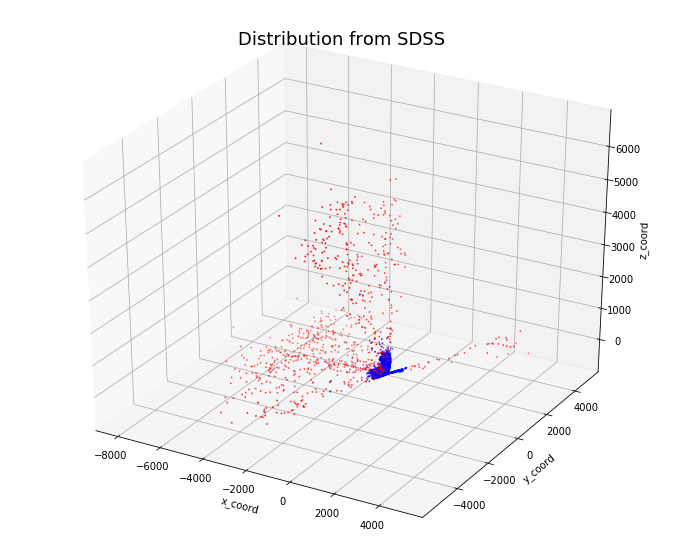

In [1019]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(galaxy['x_coord'],galaxy['y_coord'],galaxy['z_coord'], s = 0.7, color = 'b')
ax.scatter(star['x_coord'],star['y_coord'],star['z_coord'], s = 0.7, color = 'y')
ax.scatter(quasar['x_coord'],quasar['y_coord'],quasar['z_coord'], s = 0.7, color = 'r')
ax.set_xlabel('x_coord')
ax.set_ylabel('y_coord')
ax.set_zlabel('z_coord')
ax.set_title('Distribution from SDSS',fontsize=18)
plt.show()

# z is the position from galaxy in cartesian coordinate, not to be confused with redshift

### As expected, we could see distant quasars because they are too bright for a galaxy

### Okay, back to the primary dataset

In [1020]:
display(df.head())
display(df.columns)

,objid,ra,dec,u,g,r,i,z,run,rerun,...,plate,mjd,fiberid,l,b,distance,x_coord,y_coord,z_coord,u-r
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,...,3306,54922,491,283.064461,61.513772,-0.038750,0.038676,0.002387,-0.000061,3.52707
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,...,323,51615,541,283.169750,61.577466,-0.237432,0.236963,0.014902,-0.000561,1.98643
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,...,287,52023,513,283.339557,61.593309,517.978265,-516.908863,-33.247690,1.140766,1.90870
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,...,3306,54922,510,283.769013,61.576636,-0.478399,0.477308,0.032293,-0.000417,1.60420
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,...,3306,54922,512,283.762324,61.630713,2.552829,-2.546964,-0.172888,0.004569,1.11156


Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid',
       'l', 'b', 'distance', 'x_coord', 'y_coord', 'z_coord', 'u-r'],
      dtype='object')

In [1021]:
df['class'] = df['class'].astype('category').cat.codes

In [1022]:
df['class'].value_counts()

0    4998
2    4152
1     850
Name: class, dtype: int64

### We need to change the object class into numerical label

### 0s are galaxies, 2s are stars, and 1s are QSOs.

In [1023]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid',
       'l', 'b', 'distance', 'x_coord', 'y_coord', 'z_coord', 'u-r'],
      dtype='object')

In [1024]:
X_df = df.drop(['objid','u', 'g', 'r', 'i', 'z','ra', 'dec', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'plate', 'mjd', 'fiberid',
       'l', 'b', 'distance', 'x_coord', 'y_coord', 'z_coord'], axis=1).values
y_df = df['class'].values

In [1025]:
display(X_df)
display(y_df)

array([[-8.960000e-06,  3.527070e+00],
       [-5.490000e-05,  1.986430e+00],
       [ 1.231112e-01,  1.908700e+00],
       ...,
       [-4.015730e-04,  1.239460e+00],
       [ 1.401894e-02,  1.351350e+00],
       [ 1.184173e-01,  2.970440e+00]])

array([2, 2, 0, ..., 2, 0, 0], dtype=int8)

### We use RA and dec first (note that some galaxies and stars grouping in same areas thanks to mutual gravitation)

## Neural Network Model

### We will try to use standard scaler first

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

$ z = (x - u) / s $

In [1026]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#ss = StandardScaler()
#X_df = ss.fit_transform(X_df)
minmax = MinMaxScaler()
X_df = minmax.fit_transform(X_df)

In [1027]:
y_df = y_df.reshape(-1,1)

In [1028]:
display(X_df)
display(y_df)

array([[-0.36973112,  2.25474579],
       [-0.36984929,  0.2682442 ],
       [-0.05302706,  0.16801911],
       ...,
       [-0.37074104, -0.69489911],
       [-0.33364691, -0.55062811],
       [-0.06510125,  1.53702693]])

array([[2],
       [2],
       [0],
       ...,
       [2],
       [0],
       [0]], dtype=int8)

In [1029]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
y_df = enc.fit_transform(y_df).toarray()

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [1030]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df,y_df, test_size=0.25)


In [1031]:
X_train.shape

(7500, 2)

In [1032]:
y_train.shape

(7500, 3)

In [1033]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [1034]:
model = Sequential()
model.add(Dense(9, input_dim=2, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [1035]:
result = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)


Train on 7500 samples, validate on 2500 samples
Epoch 1/100
7500/7500 [==============================] - 0s 42us/step - loss: 1.0277 - accuracy: 0.5784 - val_loss: 0.9185 - val_accuracy: 0.6216
Epoch 2/100
7500/7500 [==============================] - 0s 26us/step - loss: 0.8467 - accuracy: 0.6288 - val_loss: 0.7932 - val_accuracy: 0.6460
Epoch 3/100
7500/7500 [==============================] - 0s 27us/step - loss: 0.7333 - accuracy: 0.6853 - val_loss: 0.6896 - val_accuracy: 0.7008
Epoch 4/100
7500/7500 [==============================] - 0s 27us/step - loss: 0.6432 - accuracy: 0.7113 - val_loss: 0.6147 - val_accuracy: 0.7256
Epoch 5/100
7500/7500 [==============================] - 0s 27us/step - loss: 0.5814 - accuracy: 0.7319 - val_loss: 0.5624 - val_accuracy: 0.7456
Epoch 6/100
7500/7500 [==============================] - 0s 28us/step - loss: 0.5360 - accuracy: 0.7575 - val_loss: 0.5238 - val_accuracy: 0.7704
Epoch 7/100
7500/7500 [==============================] - 0s 28us/step - loss

7500/7500 [==============================] - 0s 27us/step - loss: 0.0849 - accuracy: 0.9796 - val_loss: 0.0896 - val_accuracy: 0.9784
Epoch 57/100
7500/7500 [==============================] - 0s 27us/step - loss: 0.0840 - accuracy: 0.9795 - val_loss: 0.0886 - val_accuracy: 0.9776
Epoch 58/100
7500/7500 [==============================] - 0s 27us/step - loss: 0.0831 - accuracy: 0.9795 - val_loss: 0.0878 - val_accuracy: 0.9784
Epoch 59/100
7500/7500 [==============================] - 0s 26us/step - loss: 0.0822 - accuracy: 0.9799 - val_loss: 0.0869 - val_accuracy: 0.9784
Epoch 60/100
7500/7500 [==============================] - 0s 26us/step - loss: 0.0814 - accuracy: 0.9800 - val_loss: 0.0862 - val_accuracy: 0.9788
Epoch 61/100
7500/7500 [==============================] - 0s 26us/step - loss: 0.0806 - accuracy: 0.9799 - val_loss: 0.0852 - val_accuracy: 0.9788
Epoch 62/100
7500/7500 [==============================] - 0s 26us/step - loss: 0.0799 - accuracy: 0.9805 - val_loss: 0.0848 - val_a

In [1036]:
prediction = []
test = []

In [1037]:
y_predict = model.predict(X_test)

In [1038]:
for i in range(len(y_predict)):
    prediction.append(np.argmax(y_predict[i]))
for j in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [1039]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(prediction,test)
print('Accuracy is:', acc*100, '%')

Accuracy is: 42.4 %


### Yea, the data was indeed very raw so the accuracy should be low.